In [1]:
import math
def Bass_cumulative_probability_Ft(p, q, t):
    return (1-math.exp(-(p+q)*t))/(1+(q/p)*math.exp(-(p+q)*t))

def Bass_probability_ft(p, q, t):
    return (math.exp((p+q)*t)*p*(p+q)**2)/(p*math.exp((p+q)*t)+q)**2

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import *

url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/EN/S04_Data_Structures_2/iphone_quarter_sales.csv'
actual_sales = pd.read_csv(url, index_col='Quarter')
actual_sales.head()

,Sales
Quarter,
0,0.270
1,1.119
2,2.315
3,1.703
4,0.717


In [3]:
input = pd.DataFrame()
# we need to prepare the inputs from sales by taking the cumulative sum up until period T - 1

input["sales"] = actual_sales["Sales"]
input["cumulative_sales"] = np.cumsum(actual_sales["Sales"])
input["cumulative_sales_sq"] = [x**2 for x in input["cumulative_sales"]]
input.head()

,sales,cumulative_sales,cumulative_sales_sq
Quarter,,,
0,0.270,0.270,0.072900
1,1.119,1.389,1.929321
2,2.315,3.704,13.719616
3,1.703,5.407,29.235649
4,0.717,6.124,37.503376


In [4]:
X = input[["cumulative_sales","cumulative_sales_sq"]]
y = input["sales"]
reg = sklearn.linear_model.LinearRegression().fit(X,y)
print("intercept: "+str(reg.intercept_))
print("coefficients: "+str(reg.coef_))

a = reg.intercept_
b = reg.coef_[0]
c = reg.coef_[1]

intercept: 3.6726987894801724
coefficients: [ 1.15612351e-01 -6.23837858e-05]


In [5]:
# determine m
m1 = (-b+math.sqrt(b**2-4*a*c))/(2*c)
m2 = (-b-math.sqrt(b**2-4*a*c))/(2*c)
m = max(m1,m2)
print("m1 = ", m1, ", m2 = ", m2, "m = ", m)

m1 =  -31.24072191263632 , m2 =  1884.4843034859591 m =  1884.4843034859591


In [6]:
p = a/m
q = -m*c
print("m = ", m, ", p = ", p, "q = ", q)

m =  1884.4843034859591 , p =  0.0019489145028623142 q =  0.11756126506137607


In [7]:
import pandas as pd
column_names = ['ft','Ft','st','St']
quarter_index = list(range(40))
bass_df = pd.DataFrame(index = quarter_index, columns = column_names)
bass_df.index.name = 'Quarter'

### start your code here ###
bass_df['ft'] = [Bass_probability_ft(p, q, t) for t in bass_df.index]
bass_df['Ft'] = [Bass_cumulative_probability_Ft(p, q, t) for t in bass_df.index]
bass_df['st'] = [m*bass_df.at[t,'ft'] for t in bass_df.index]
bass_df['St'] = [m*bass_df.at[t,'Ft'] for t in bass_df.index]
### end your code here ###

bass_df

,ft,Ft,st,St
Quarter,,,,
0,0.001949,0.000000,3.672699,0.000000
1,0.002187,0.002066,4.121845,3.893112
2,0.002453,0.004384,4.623538,8.261201
3,0.002751,0.006983,5.183301,13.159540
4,0.003082,0.009896,5.807073,18.649135
5,0.003450,0.013159,6.501194,24.797131
6,0.003859,0.016809,7.272376,31.677206
7,0.004313,0.020892,8.127653,39.369912
8,0.004815,0.025452,9.074300,47.962967


<Axes: xlabel='Quarter'>

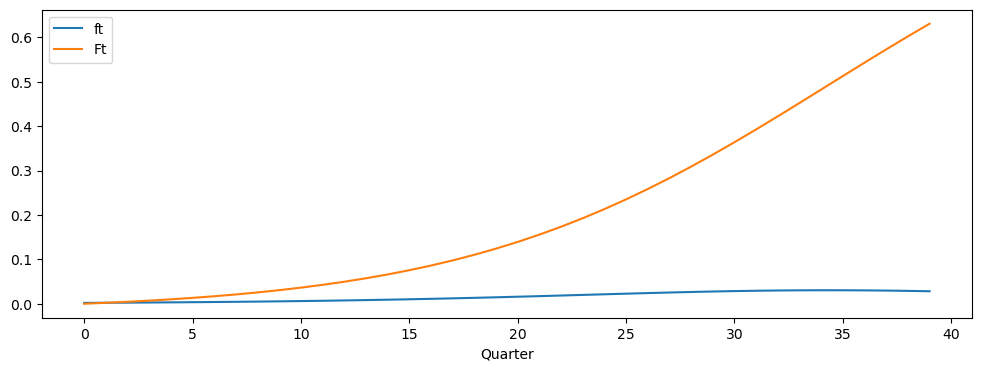

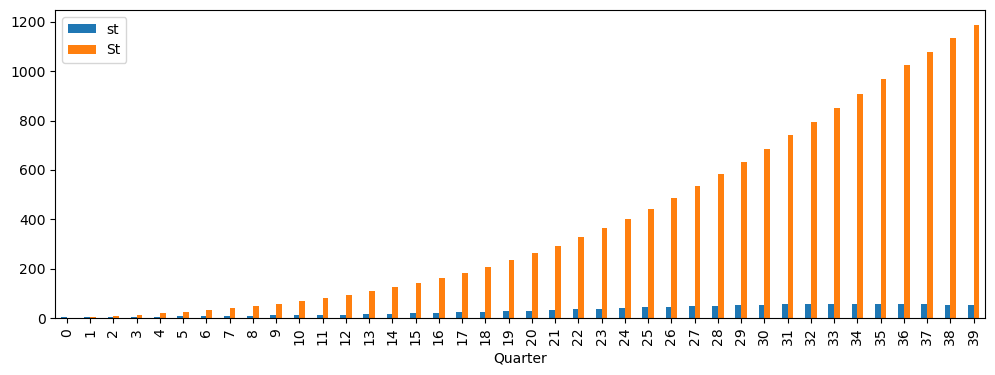

In [8]:
### start your code here ###
bass_df[['ft','Ft']].plot(figsize = (12,4))
bass_df[['st','St']].plot(kind = 'bar', figsize = (12,4))
### end your code here ###

In [9]:
### start your code here ###
bass_df['Actual'] = actual_sales['Sales']
bass_df['CumulativeActual'] = [sum(actual_sales.loc[:t,'Sales']) for t in actual_sales['Sales'].index]
bass_df['PError'] = (bass_df['Actual'] - bass_df['st'])/bass_df['Actual']
### end your code here ###
bass_df

,ft,Ft,st,St,Actual,CumulativeActual,PError
Quarter,,,,,,,
0,0.001949,0.000000,3.672699,0.000000,0.270,0.270,-12.602588
1,0.002187,0.002066,4.121845,3.893112,1.119,1.389,-2.683508
2,0.002453,0.004384,4.623538,8.261201,2.315,3.704,-0.997209
3,0.002751,0.006983,5.183301,13.159540,1.703,5.407,-2.043629
4,0.003082,0.009896,5.807073,18.649135,0.717,6.124,-7.099125
5,0.003450,0.013159,6.501194,24.797131,6.892,13.016,0.056704
6,0.003859,0.016809,7.272376,31.677206,4.363,17.379,-0.666829
7,0.004313,0.020892,8.127653,39.369912,3.793,21.172,-1.142803
8,0.004815,0.025452,9.074300,47.962967,5.208,26.380,-0.742377


In [10]:
quarter_index_date = pd.date_range('4/1/2007', periods=40, freq='Q')
quarter_index_date


DatetimeIndex(['2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30', '2009-12-31', '2010-03-31',
               '2010-06-30', '2010-09-30', '2010-12-31', '2011-03-31',
               '2011-06-30', '2011-09-30', '2011-12-31', '2012-03-31',
               '2012-06-30', '2012-09-30', '2012-12-31', '2013-03-31',
               '2013-06-30', '2013-09-30', '2013-12-31', '2014-03-31',
               '2014-06-30', '2014-09-30', '2014-12-31', '2015-03-31',
               '2015-06-30', '2015-09-30', '2015-12-31', '2016-03-31',
               '2016-06-30', '2016-09-30', '2016-12-31', '2017-03-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

<Axes: xlabel='Quarter'>

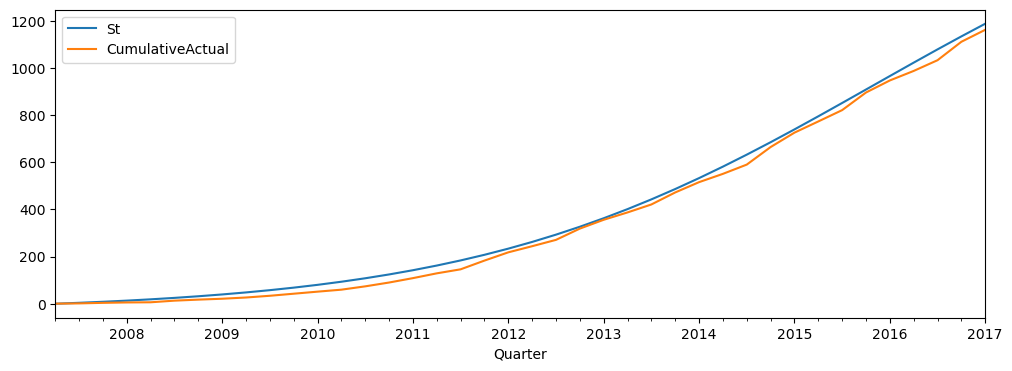

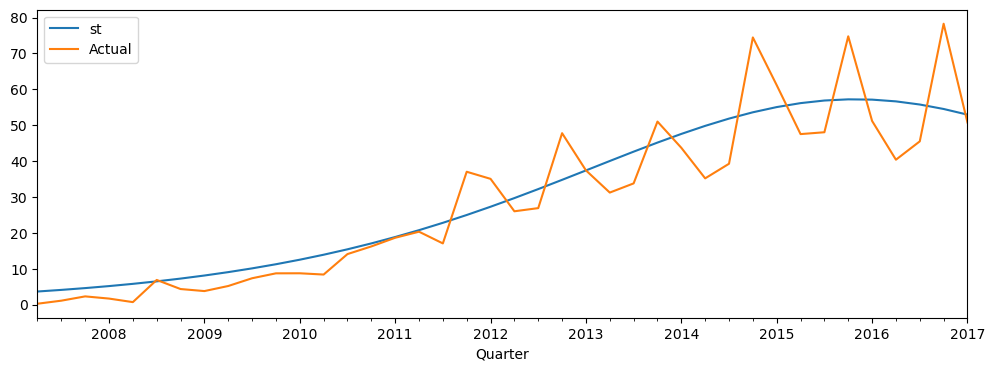

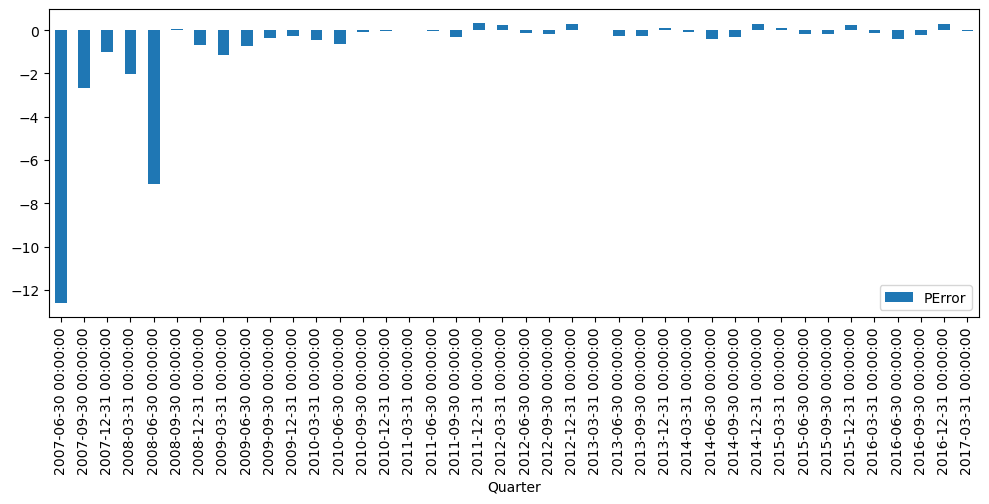

In [11]:
### start your code here ###
bass_df = bass_df.set_index(quarter_index_date)
bass_df.index.names = ['Quarter']
bass_df[['St','CumulativeActual']].plot(figsize=(12,4))
bass_df[['st','Actual']].plot(figsize=(12,4))
bass_df[['PError']].plot(kind='bar',figsize=(12,4))
### end your code here ###